In [ ]:
# DSC 540
# Weeks 9 & 10 
# Summer 2024
# Term Project Milestone 5
# Created By Matthew Heinen
# 8/7/24

# Weather and Carlos Santana’s Effectiveness
## DSC 540: Milestone 5

# Load Datasets into SQL Database

Here we will take all 3 tables that we have created in previous milestones, flat file, web scraped and API data, and write or load them into a database. As a reminder the 3 tables are as follows: 

Flat File: Baseball Savant data from all balls put in play across Carlos Santana's 17 year MLB career. 
Web Scraped: Data from Steamheads about MLB ballpark latitude, longitude and altitude. 
API: Historical weather data recorded from the location and time of the games Santana played in. 


In [33]:
# Import Packages. 
import pandas as pd
import sqlite3

# Read the CSV file into a DataFrame
bip = pd.read_csv('carlos_balls_in_play.csv')
weather = pd.read_csv('carlos_weather_from_api_no_duplicates.csv')
ballparks = pd.read_csv('ballpark_data_web.csv')
ab_key = pd.read_csv('ab_key.csv')


# Connect to the SQLite database named carlos.db
conn = sqlite3.connect('carlos.db')

# Write the DataFrame to a SQL database
bip.to_sql('carlos_balls_in_play', conn, if_exists='replace', index=False)
weather.to_sql('weather', conn, if_exists='replace', index=False)
ballparks.to_sql('ballparks', conn, if_exists='replace', index=False)
ab_key.to_sql('ab_key', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [10]:
# Establish connection 
# We have to re establish connection after the connection was closed above. 
conn = sqlite3.connect("carlos.db")  

# Define the cursor as c, This will be used to execute SQL commands and queries. 
c = conn.cursor()

# Join Tables From Database Into 1 Dataframe

Here we will join all of the tables in our database into one DataFrame to perform our analysis. 

In [41]:
# Write SQL query to join all tables into one for the purpose of making one large data set. 
# Join bip to ab_key (on abbreviation) 
# Join ab_key to ballparks (on lat and lon)
# Join ballparks to weather (on lat, lon and unix time (from bip))
# All should be inner joins. 

query = ''' 
SELECT *
FROM carlos_balls_in_play
INNER JOIN ab_key ON carlos_balls_in_play.home_team = ab_key.abreviation
INNER JOIN ballparks ON ab_key.team_name = ballparks.Team
INNER JOIN weather ON ballparks.lat = weather.lat AND ballparks.long = weather.lon AND carlos_balls_in_play.unix_time = weather.datetime;
'''

In [55]:
# Import packages. 
import sqlite3
import pandas as pd

# Establish connection 
# We have to re establish connection after the connection was closed above. 
conn = sqlite3.connect("carlos.db")  

# Read the results of the SQL query into carlos_data DataFrame. 
carlos_data = pd.read_sql_query(query , conn)

# Close the connection
conn.close()

In [63]:
# Verify that the DataFrame has read in properly. 
carlos_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,pitcher_id,ab_result,pitch_zone_location,description,...,temp,feels_like,pressure_hPa,humidity,dew_point,cloud_cover,wind_deg,weather_type,description,pressure_atm
0,SI,2018-06-19,101.2,-1.43,6.18,"Hicks, Jordan",663855,field_out,1,"Carlos Santana grounds out, shortstop Yairo Mu...",...,82.562,81.698,1009,38,54.410,40,10,Clouds,scattered clouds,0.995806
1,FF,2015-05-24,100.9,0.84,6.34,"Chapman, Aroldis",547973,single,7,Carlos Santana singles on a ground ball to cen...,...,77.810,76.658,1021,29,43.052,100,130,Clouds,overcast clouds,1.007649
2,SI,2019-05-26,100.5,0.86,6.66,"Alvarado, José",621237,force_out,9,"Carlos Santana grounds into a force out, field...",...,60.458,60.476,1017,91,57.812,100,20,Mist,mist,1.003701
3,FF,2023-06-03,100.2,-1.47,6.24,"Hicks, Jordan",663855,single,2,Carlos Santana singles on a fly ball to left f...,...,79.070,79.070,1013,73,69.674,75,80,Clouds,broken clouds,0.999753
4,FF,2019-09-14,100.1,-1.55,6.44,"Graterol, Brusdar",660813,field_out,12,"Carlos Santana grounds out, shortstop Jorge Po...",...,69.404,69.296,1022,69,58.802,0,270,Clear,clear sky,1.008636


In [67]:
# Verify the shape of the DataFrame. 
carlos_data.shape


(1942, 82)

In [71]:
# Print all the column names in carlos_data. 
# This will both help us verify and refresh our memory of whats in the DataFrame. 
print(carlos_data.columns)

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'pitcher_id', 'ab_result',
       'pitch_zone_location', 'description', 'game_type', 'batter_stance',
       'p_throws', 'home_team', 'away_team', 'hit_location', 'bb_type',
       'balls', 'strikes', 'pitch_hor_break', 'pitch_ver_break', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_id',
       'release_pos_y', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'babip_value', 'iso_value',
       'contact_type', 'at_bat_number', 'pitch_number', 'pitch_name',
       'home_score', 'away_score', 'bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score',
       'if_fielding_alignment', 'of_fielding_alignment', 'spin_axis',
       '

Here we can see that all of our data appears to have read in properly and completely. We can now begin our analysis. 

# Create 5 Visualizations That Demonstrate the Data. 

## Temperature vs Launch Speed

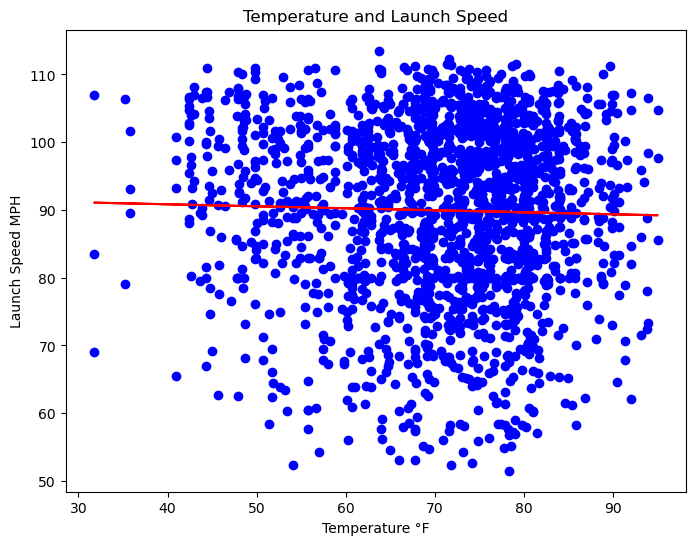

In [75]:
# Build Scatter plot showing the relationship between temperature and launch speed. 

# Import necessary packages. 
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(carlos_data['temp'], carlos_data['launch_speed'], color='b', marker='o')

# Use numpy to add a trendline
# Define coefficients
coefficients = np.polyfit(carlos_data['temp'], carlos_data['launch_speed'], 1)
# Define Trendline
trendline = np.poly1d(coefficients)
# plot Trendline
plt.plot(carlos_data['temp'], trendline(carlos_data['temp']), color='r', label='Trendline')
# Add labels and title
plt.title('Temperature and Launch Speed')
plt.xlabel('Temperature °F')
plt.ylabel('Launch Speed MPH')

# Display the plot
plt.show()

In [89]:
# Lets now define this trend line and as a linear regression model to evaluate the effects of temp on launch speed. 

# Import packages
import statsmodels.formula.api as smf

# build model
model = smf.ols('launch_speed ~ temp', data=carlos_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           launch_speed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.251
Date:                Sat, 10 Aug 2024   Prob (F-statistic):              0.263
Time:                        09:56:47   Log-Likelihood:                -7726.5
No. Observations:                1942   AIC:                         1.546e+04
Df Residuals:                    1940   BIC:                         1.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.0075      1.887     48.769      0.000      88.308      95.707
temp          -0.0295      0.026     -1.119      0.263      -0.081       0.022
==============================================================================
Omnibus:                      104.176   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.057
Skew:                          -0.577   Prob(JB):                     1.04e-25
Kurtosis:                       2.697   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see above temperature does not appear to have much of an effect on Santana's launch speed. Although there is a negative trend suggesting increasing temperatures decrease launch speed, the results are not significant. 

## Weather Type and Estimated Batting Average Using Speed Angle

In [79]:
# Build a bar graph to show estimated_ba_uning_speedangle for each weather type. 

# Use Group by to calculate average estimated ba by weather. 
est_ba_by_weather = carlos_data.groupby('weather_type')['estimated_ba_using_speedangle'].mean()

print(est_ba_by_weather)

weather_type
Clear           0.311124
Clouds          0.319091
Haze            0.302318
Mist            0.436450
Rain            0.319975
Smoke           0.388077
Thunderstorm    0.300484
Name: estimated_ba_using_speedangle, dtype: float64


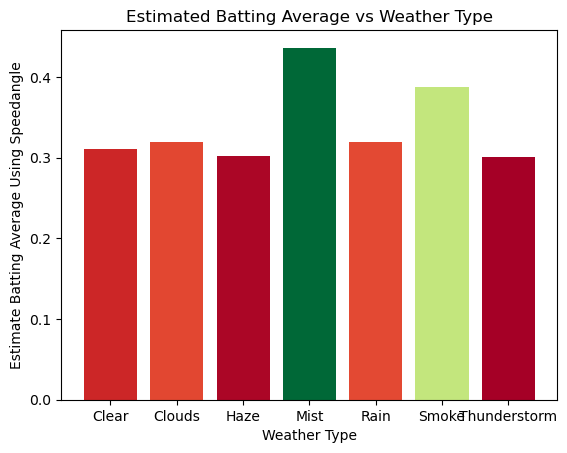

In [85]:
# Build a bar graph to show estimated_ba_uning_speedangle for each weather type. 

# create normalized values for ba
normalized_values = (est_ba_by_weather - est_ba_by_weather.min()) / (est_ba_by_weather.max() - est_ba_by_weather.min())

# create the color scale for conditional formatting 
# Use RdYlGn colormap
colors = plt.cm.RdYlGn(normalized_values) 

# Create plot
plt.bar(est_ba_by_weather.index, est_ba_by_weather.values, color= colors)

# Add labels and title
plt.xlabel('Weather Type')
plt.ylabel('Estimate Batting Average Using Speedangle')
plt.title('Estimated Batting Average vs Weather Type')

# Display the graph
plt.show()

In [95]:
# Perform an ANOVA test to see the significance of the results. 

# Import packages. 
import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA test
grouped_data = [carlos_data[carlos_data['weather_type'] == category]['estimated_ba_using_speedangle'] for category in df['weather_type'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.7578792617405989
P-value: 0.6031269115369913


Here we can see that although Santana appears to perform better in mist ad smoke compared to other weather conditions there is no statistical difference in his performance. 

## Hits in Each Weather Condition

Text(0.5, 1.0, 'Hit Distribution Given Weather Conditions')

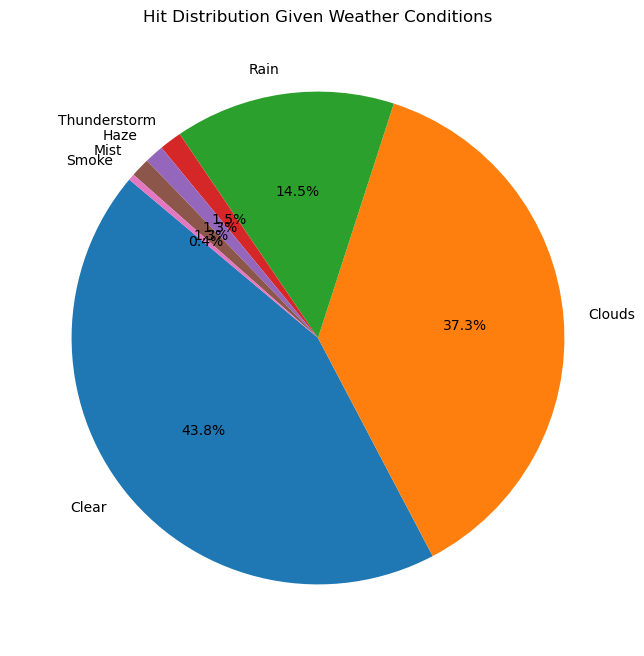

In [148]:
# Create a pie chart showing the percentage of Santana's hits in each weather condition. 

# Calculate the weather value counts for hits. 
weather_counts = carlos_hits['weather_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Hit Distribution Given Weather Conditions')

Here we see Santana's hit distribution across different weather types. Santana has recorded the most hits in cloudy and clear conditions. 

## Temperature and Hits

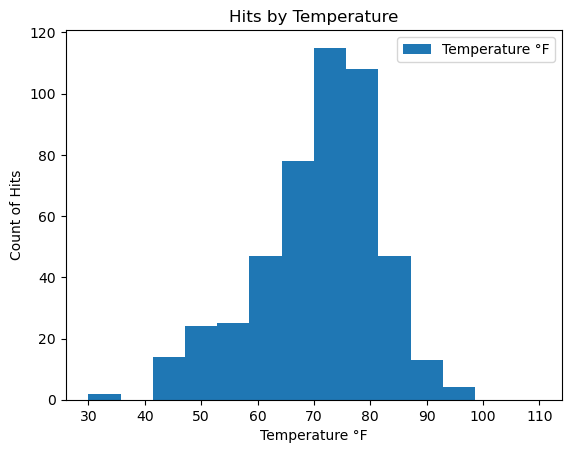

In [110]:
# Build a histogram to show Santanas career hit dispersion across different temperatures. 

# Filter the carlos_data DataFrame to only include hits. 
carlos_hits = carlos_data[carlos_data['babip_value'] == 1]

# Import Packages
import numpy as np
import matplotlib.pyplot as plt

# build histogram 
x = carlos_hits.temp
# Use 15 bins temp 30 to 110.
bins = np.linspace(30, 110, 15)

plt.hist([x], bins, label=['Temperature °F'])
plt.legend(loc='upper right')
plt.xlabel("Temperature °F")
plt.ylabel("Count of Hits")
plt.title("Hits by Temperature")
plt.show()

As we see above Santana records the most hits in moderate temperatures. This is likely because these are the most common conditions. 

## Altitude and Hit Distance 

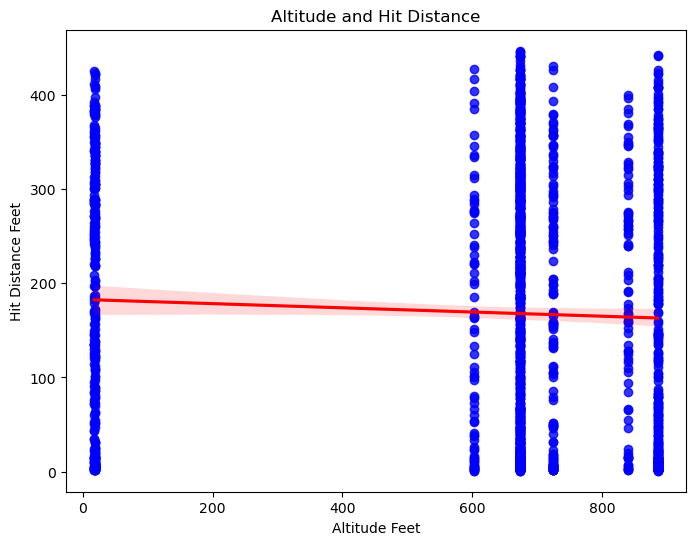

In [131]:
# Lets evaluate the affect of altitude on Santana's hit distance. 

# Import necessary packages. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
# Plot regression line
sns.regplot(x='Alt', y='hit_distance_sc', data=carlos_data, scatter_kws={'color': 'b'}, line_kws={'color': 'r'})

# Add labels and title
plt.title('Altitude and Hit Distance')
plt.xlabel('Altitude Feet')
plt.ylabel('Hit Distance Feet')

# Display the plot
plt.show()

In [127]:
# Lets now define this trend line and as a linear regression model to evaluate the effects of altitude on hit distance. 

# Import packages
import statsmodels.formula.api as smf

# build regression model
model = smf.ols('hit_distance_sc ~ Alt', data=carlos_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        hit_distance_sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.567
Date:                Sat, 10 Aug 2024   Prob (F-statistic):             0.0591
Time:                        11:35:37   Log-Likelihood:                -11679.
No. Observations:                1839   AIC:                         2.336e+04
Df Residuals:                    1837   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    182.8729      7.877     23.215      0.000     167.424     198.322
Alt           -0.0222      0.012     -1.889      0.059      -0.045       0.001
==============================================================================
Omnibus:                    25195.438   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.533
Skew:                           0.219   Prob(JB):                     8.39e-36
Kurtosis:                       1.616   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we see that increasing altitude actually has a negative effect on Santana's Performances. This phenomena actually goes against the common thought that the ball flies further at altitude. Although this model does not explain a lot of variance in the data (less than 99%) we do know that altitude is nearly a statistically significant predictor to the 95% confidence level and is significant at the 90% confidence level. Given this result I would suggest that if Santana were to maximize value he should seek to play for teams with stadiums at low elevation. 

## Roof Type and Change in Run Expectancy. 

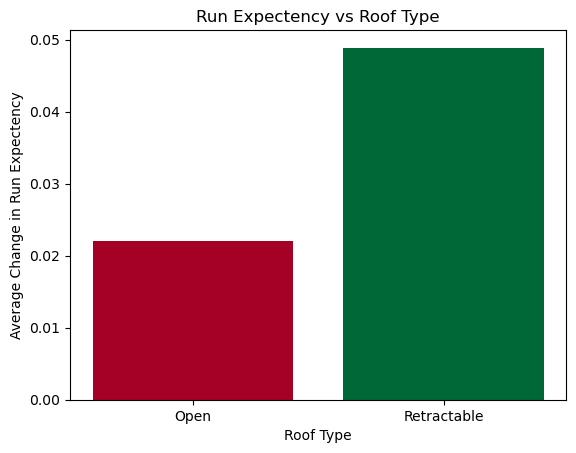

In [159]:
# Evaluate roof types effect on delta_run_exp. 

# Use Group by to calculate average estimated ba by weather. 
run_exp_by_roof = carlos_data.groupby('Roof type')['delta_run_exp'].mean()

# create normalized values for ba
normalized_values = (run_exp_by_roof - run_exp_by_roof.min()) / (run_exp_by_roof.max() - run_exp_by_roof.min())

# create the color scale for conditional formatting 
colors = plt.cm.RdYlGn(normalized_values)  # Use RdYlGn colormap

# Create plot
plt.bar(run_exp_by_roof.index, run_exp_by_roof.values, color= colors)

# Add labels and title
plt.xlabel('Roof Type')
plt.ylabel('Average Change in Run Expectency')
plt.title('Run Expectency vs Roof Type')

# Display the graph
plt.show()



In [163]:
# Perform a 2 sample T-test to test the difference in values here. 

# Import packages. 
from scipy import stats

# create open and retractable datasets
Open = carlos_data[carlos_data['Roof type']=='Open']
Retractable = carlos_data[carlos_data['Roof type']=='Retractable']

# Perform two-sample t-test on the difference of change in run expectancy. 
t_statistic, p_value = stats.ttest_ind(Open['delta_run_exp'], Retractable['delta_run_exp'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.6194026323537268
P-value: 0.5357238803745824


Based on this result there is no statistically significant difference in Santana's hitting performance for balls in play based off the roof type. Although the bar chart above may suggest that Santana performs better under a retractable roof, Our results from the T-test prove there is no difference. 

## Seasonality Affect on Expected Runs

In [176]:
# Evaluate the affect that what part of the season we are in has on Santana's performance. 

# Import packages 
import datetime

# Initialize temp df
carlos_weeks = carlos_data

# Convert Unix time to datetime
carlos_weeks['DateTime'] = pd.to_datetime(carlos_weeks['unix_time'], unit='s')  
# Calculate the week of the year using .dt.isocalendar().week store in new variable. 
carlos_weeks['week_of_year'] = carlos_weeks['DateTime'].dt.isocalendar().week  
# Cast 'week_of_year' as int
carlos_weeks['week_of_year'] = carlos_weeks['week_of_year'].astype(int)

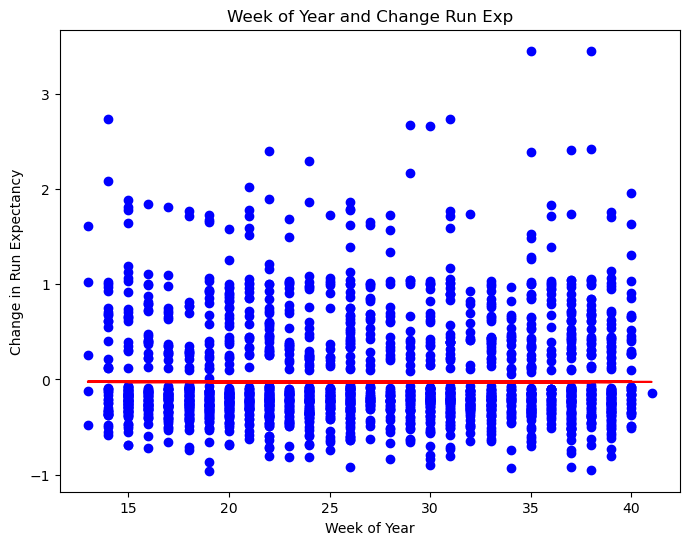

In [188]:
# Plot the affect week of the time of year on Santana's change in run expectancy. 

# Import necessary packages. 
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
# Build Scatter 
plt.scatter(carlos_weeks['week_of_year'], carlos_weeks['delta_run_exp'], color='b', marker='o')

# Use numpy to add a trendline
# Define coefficients
coefficients = np.polyfit(carlos_weeks['week_of_year'], carlos_weeks['delta_run_exp'], 1)
# Define Trendline
trendline = np.poly1d(coefficients)
# plot Trendline
plt.plot(carlos_weeks['week_of_year'], trendline(carlos_weeks['delta_run_exp']), color='r', label='Trendline')

# Add labels and title
plt.title('Week of Year and Change Run Exp')
plt.xlabel('Week of Year')
plt.ylabel('Change in Run Expectancy')

# Display the plot
plt.show()


In [192]:
# View Trendline and regression results. 

# Import packages
import statsmodels.formula.api as smf

# build regression model
model = smf.ols('delta_run_exp ~ week_of_year', data=carlos_weeks)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delta_run_exp   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.372
Date:                Sat, 10 Aug 2024   Prob (F-statistic):              0.242
Time:                        13:45:52   Log-Likelihood:                -1588.7
No. Observations:                1942   AIC:                             3181.
Df Residuals:                    1940   BIC:                             3192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0262      0.045     -0.582      0.561      -0.115       0.062
week_of_year     0.0019      0.002      1.171      0.242      -0.001       0.005
==============================================================================
Omnibus:                      690.847   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2395.620
Skew:                           1.768   Prob(JB):                         0.00
Kurtosis:                       7.135   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although as we can see from the trendline in the scatter plot above there is a trend for Santana's performance to increase over the course of the season, there is no statistical significance to those results. Additionally, the model explains nearly zero percent of the variance in run expectancy. 

## Pitch Location and Change in Run Expectancy. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


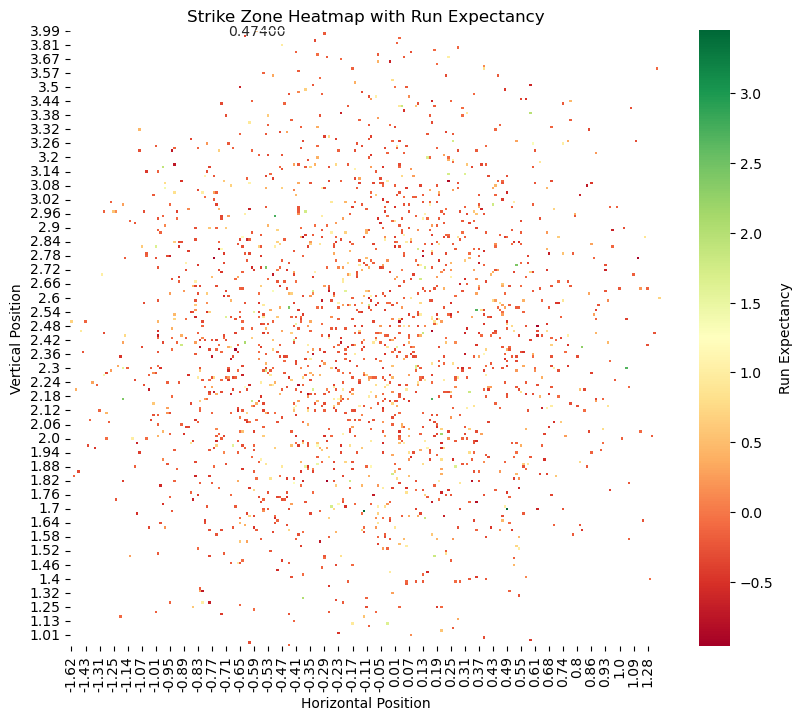

In [219]:
# Evaluate the effect of pitch location on change in run expectancy. 

# Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use Pivot to create a 2D grid of the change in run expectancy values
heatmap_data = df.pivot_table(index='plate_z', columns='plate_x', values='delta_run_exp')

# Reverse the order of the y-axis to show strike zone properly. 
heatmap_data = heatmap_data.reindex(index=heatmap_data.index[::-1])

# Create the heatmap
plt.figure(figsize=(10, 8))
# Use red yellow green color map 
sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, fmt=".5f", cbar_kws={'label': 'Run Expectancy'}, square=True)

# label axis
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Strike Zone Heatmap with Run Expectancy')

# Display the heatmap
plt.show()

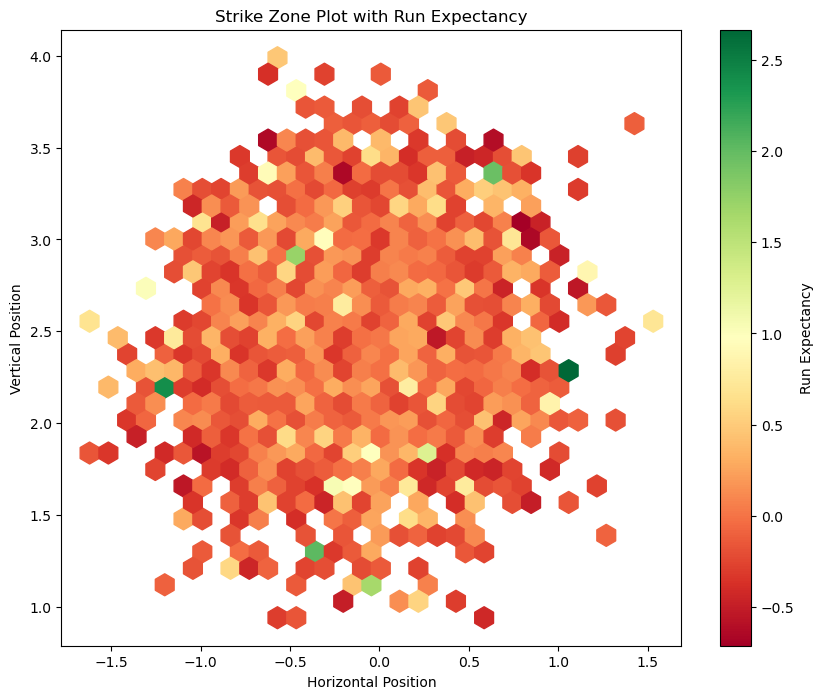

In [217]:
# Display the same plot as above but use hexbin method to improve readability. 

# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt


# Create the hexbin plot
plt.figure(figsize=(10, 8))
# use reduce_C_function=np.mean to find the mean run expectancy for hexagon 
hb = plt.hexbin(carlos_data['plate_x'], carlos_data['plate_z'], C=carlos_data['delta_run_exp'], gridsize=30, cmap='RdYlGn', reduce_C_function=np.mean)

# Add a color key to show run expectancy value
cb = plt.colorbar(hb, label='Run Expectancy')

# Add labels and title
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Strike Zone Plot with Run Expectancy')

# Display the plot
plt.show()

As we can see by this heat map, Santana has some very high run expectancy in specific locations on the right and left side of the plate. This is likely due to Santana being able to pull the ball from both sides of the plate as a switch hitter. 

# Summary and Ethical Implications. 

        Now that we have combined all of our data sources into one database, we can begin to do some visualization and analysis of how weather affects Carlos Santana’s performance. To nobody’s surprise weather factors had little to no impact on Santana’s hitting performance. Santana has garnished a reputation for consistency over his 17-year career. That consistency has earned him roster spots well into his 40’s. It is only natural to see that this consistency carries into his performance in various weather conditions. Perhaps the most powerful finding from our analysis is that there is some evidence that Santana’s hit distance decreases at higher altitude compared to common trend of thinner air letting the ball travel more. The model we build only explains less than 1% of variance. However, this phenomenon is statistically significant to the 90% confidence interval.  

         We have also shown through our analysis that although Santana may record most of his hits in moderate temperatures, temperature has no statistical effect on launch speed. Additionally, as we see that Santana collects most of his hits in cloudy and clear conditions. However, there is no statistical difference in the expected batting average between the different weather conditions. Similarly, ballpark roof type has no effect on the change in run expectancy.  

        Santana himself has stated that he usually has a slow start to the season. As seen in our scatter plot and trendline, that information is supported when it comes to run expectancy from balls put in play. However, this effect is very small and statistically insignificant.  

        Lastly, we performed some analysis on how pitch location affects expected runs for Santana’s balls put in play. From the created heat maps, we saw the effects of Santana’s strategic advantage as a switch hitter being able to pull the ball from both sides of the plate and maximize run expectancy.  

        Turning to the ethical implications of this project. Over the course of this project, we have made many transformations to this data. The most prominent is the assumption that every game time was 7pm. Another assumption was that all games were played in regular MLB ballparks, not taking into account neutral site games or decommissioned parks. The discrepancies in this data could cause the weather pulled from the API to be inaccurate in some cases. This project relied on the sheer sample size of Santana’s career to mitigate these effects on his performance. Another choice we made was to eliminate fluke plays by removing outliers in exit velocity and angle. This transformation helped us evaluate Santana’s performance across normal plays only. However, there is potential that these discrepancies have affected our analysis and thus could impact Santana’s career outlook. All our data is collected from credible sources such as MLB themselves, key protected API’s and reputable websites. Because of the public information used in this project there are minimal ethical dilemmas with how it is collected.  

# Final Dataset

In [239]:
# Display first 25 rows. 
carlos_data.head(25)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,pitcher_id,ab_result,pitch_zone_location,description,...,humidity,dew_point,cloud_cover,wind_deg,weather_type,description,pressure_atm,DateTime,WeekOfYear,week_of_year
0,SI,2018-06-19,101.2,-1.43,6.18,"Hicks, Jordan",663855,field_out,1,"Carlos Santana grounds out, shortstop Yairo Mu...",...,38,54.410,40,10,Clouds,scattered clouds,0.995806,2018-06-20,25,25
1,FF,2015-05-24,100.9,0.84,6.34,"Chapman, Aroldis",547973,single,7,Carlos Santana singles on a ground ball to cen...,...,29,43.052,100,130,Clouds,overcast clouds,1.007649,2015-05-25,22,22
2,SI,2019-05-26,100.5,0.86,6.66,"Alvarado, José",621237,force_out,9,"Carlos Santana grounds into a force out, field...",...,91,57.812,100,20,Mist,mist,1.003701,2019-05-27,22,22
3,FF,2023-06-03,100.2,-1.47,6.24,"Hicks, Jordan",663855,single,2,Carlos Santana singles on a fly ball to left f...,...,73,69.674,75,80,Clouds,broken clouds,0.999753,2023-06-04,22,22
4,FF,2019-09-14,100.1,-1.55,6.44,"Graterol, Brusdar",660813,field_out,12,"Carlos Santana grounds out, shortstop Jorge Po...",...,69,58.802,0,270,Clear,clear sky,1.008636,2019-09-15,37,37
5,FC,2022-04-11,100.1,-0.46,6.06,"Clase, Emmanuel",661403,field_out,5,"Guardians challenged (force play), call on the...",...,41,39.542,0,110,Clear,clear sky,0.995806,2022-04-12,15,15
6,FF,2018-06-25,100.0,0.51,6.14,"Chapman, Aroldis",547973,field_out,7,Carlos Santana flies out to left fielder Gianc...,...,34,46.382,40,340,Clouds,scattered clouds,1.005675,2018-06-26,26,26
7,FF,2017-08-21,99.7,-2.03,5.91,"Kelly, Joe",523260,field_out,3,Carlos Santana flies out to center fielder Jac...,...,72,68.918,20,200,Clouds,few clouds,1.003701,2017-08-22,34,34
8,FF,2019-07-18,99.7,-1.36,6.15,"Rosenthal, Trevor",572096,field_out,6,Carlos Santana flies out to right fielder Nich...,...,62,72.140,0,200,Clear,clear sky,0.996793,2019-07-19,29,29
9,FF,2024-05-07,99.5,-0.49,6.65,"Stanek, Ryne",592773,field_out,2,Carlos Santana flies out to center fielder Jul...,...,50,48.146,100,240,Clouds,overcast clouds,0.982976,2024-05-08,19,19


In [241]:
# Display last 25 rows. 
carlos_data.tail(25)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,pitcher_id,ab_result,pitch_zone_location,description,...,humidity,dew_point,cloud_cover,wind_deg,weather_type,description,pressure_atm,DateTime,WeekOfYear,week_of_year
1917,CU,2022-05-20,74.9,2.28,5.89,"Smeltzer, Devin",656970,field_out,11,"Carlos Santana grounds out softly, third basem...",...,53,48.722,100,360,Clouds,overcast clouds,0.991858,2022-05-21,20,20
1918,CU,2015-06-11,74.7,-1.55,6.54,"Wilhelmsen, Tom",452666,field_out,11,"Carlos Santana grounds out, shortstop Brad Mil...",...,69,57.254,0,40,Rain,light rain,0.999753,2015-06-12,24,24
1919,CU,2015-07-28,74.6,1.99,6.02,"Morales, Franklin",462985,single,6,Carlos Santana singles on a ground ball to thi...,...,72,68.972,0,20,Clear,clear sky,1.001727,2015-07-29,31,31
1920,CU,2021-04-20,74.4,1.49,5.89,"Hill, Rich",448179,field_out,5,"Carlos Santana grounds out sharply, third base...",...,44,23.594,0,300,Clear,clear sky,1.008636,2021-04-21,16,16
1921,ST,2023-08-26,74.3,2.78,4.54,"Cosgrove, Tom",676680,field_out,7,"Carlos Santana grounds out, shortstop Xander B...",...,77,57.920,75,40,Clouds,broken clouds,1.005675,2023-08-27,34,34
1922,CU,2018-04-07,74.2,1.99,5.74,"Peters, Dillon",596071,field_out,3,"Carlos Santana grounds out, third baseman Bria...",...,26,13.784,100,330,Clouds,overcast clouds,0.998766,2018-04-08,14,14
1923,CU,2017-04-30,74.2,1.74,5.92,"Overton, Dillon",592614,field_out,5,Carlos Santana flies out to right fielder Ben ...,...,53,61.664,75,180,Rain,moderate rain,0.995806,2017-05-01,18,18
1924,CU,2017-04-30,74.2,1.74,5.92,"Overton, Dillon",592614,field_out,5,Carlos Santana flies out to right fielder Ben ...,...,53,61.664,75,180,Thunderstorm,thunderstorm,0.995806,2017-05-01,18,18
1925,CU,2022-08-05,74.1,-2.32,4.82,"Herget, Jimmy",623474,field_out,13,"Carlos Santana grounds out softly, pitcher Jim...",...,58,57.614,0,9,Rain,light rain,1.002714,2022-08-06,31,31
1926,CU,2017-06-15,73.9,1.79,5.91,"Hill, Rich",448179,field_out,2,Carlos Santana lines out to third baseman Loga...,...,72,65.750,0,310,Clear,clear sky,0.995806,2017-06-16,24,24
